<a href="https://colab.research.google.com/github/ctshiz/Econometrics/blob/main/stacking_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet
from xgboost import XGBRegressor

catalog_name = 'corporate_smartcapex_refined_dev'
model_experiment_path = '/dev/smartcapex/br_global_smartcapex_analytics_teste'

# COMMAND ----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.metrics import mean_absolute_percentage_error, r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error



from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
import lightgbm as lgb

import statsmodels.api as sm

# grid search hyperparameters for ridge regression
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
#from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import time
import matplotlib.pyplot as plt
#from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.pipeline import make_pipeline

# grid search hyperparameters for ridge regression
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.impute import SimpleImputer
import time
import matplotlib.pyplot as plt
#from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_val_predict, cross_validate

import datetime
from datetime import datetime, timedelta
from dateutil import tz
pd.set_option('float_format', '{:f}'.format)

SEED = 42
PATH = '../input/'

#creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.dummy import DummyClassifier,DummyRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet
from xgboost import XGBRegressor

In [10]:
df_treino_7 = pd.read_csv("/content/treinamento.csv")

#drop row with valor_moeda_acc = 0
df_treino_8 = df_treino_7[df_treino_7['valor_moeda_acc'] > 0]

#split into train and test data
train_dataset = df_treino_8.sample(frac=0.8, random_state=0)
test_dataset = df_treino_8.drop(train_dataset.index)

#separate features from labels
train_labels = train_dataset.pop("percent_desemb_acumulado")
test_labels = test_dataset.pop("percent_desemb_acumulado")

#feature engineering
new_train_data = train_dataset.copy()
new_test_data = test_dataset.copy()

new_train_data['ultimo_orcamento/rz_orcamento_duracao_fim'] = new_train_data['ultimo_orcamento'] / new_train_data['rz_orcamento_duracao_fim']
new_test_data['ultimo_orcamento/rz_orcamento_duracao_fim'] = new_test_data['ultimo_orcamento'] / new_test_data['rz_orcamento_duracao_fim']


#apply log
features = ['period','valor_moeda_acc', 'percent_desemb', 'percent_avanc_mensal','valor_moeda_acc_acumulado',
                                   'max_period','percent_closure', 'percent_closure_inv',
                                    'duracao_inop', 'duracao_fim', 'ultimo_orcamento/rz_orcamento_duracao_fim']

new_train_data_ = new_train_data.copy()
new_test_data_ = new_test_data.copy()


new_train_data_ = new_train_data[[ 'percent_avanc_mensal', 'pda_1', 'pda_2', 'pda_3', 'pda_4','pda_5', 'pda_6','pda_7', 'pda_8', 'pda_9', 'pd_1', 'pd_2', 'pd_3', 'inc_1', 'inc_2','inc_3', 'inc_5', 'inc_7', 'inc_9', 'cinc_3', 'pda_mean_2','pda_mean_3', 'pda_mean_4', 'n_zero_pd']]

new_test_data_ = new_test_data[[ 'percent_avanc_mensal', 'pda_1', 'pda_2', 'pda_3', 'pda_4','pda_5', 'pda_6','pda_7', 'pda_8', 'pda_9', 'pd_1', 'pd_2', 'pd_3', 'inc_1', 'inc_2','inc_3', 'inc_5', 'inc_7', 'inc_9', 'cinc_3', 'pda_mean_2','pda_mean_3', 'pda_mean_4', 'n_zero_pd']]

#normalize os dados
norm_train_data_ = pd.DataFrame(StandardScaler().fit_transform(new_train_data_), columns=new_train_data_.columns)
norm_test_data_ = pd.DataFrame(StandardScaler().fit_transform(new_test_data_), columns=new_test_data_.columns)


#new_train_data_ = new_train_data[['pda_1', 'ultimo_orcamento/rz_orcamento_duracao_fim', "cinc_3","pd_3","inc_5","pd_2","inc_3","inc_2","valor_moeda_acc_acumulado","pd_1","percent_desemb","duracao_fim", "rai", "inc_9", "n_zero_pd", "inc_7"]]

#vou retirar o "valor_moeda_acc" por enquanto.
#[['period','valor_moeda_acc', 'percent_desemb', 'percent_avanc_mensal','valor_moeda_acc_acumulado',
#                                   'max_period','percent_closure', 'percent_closure_inv','rai',
#                                    'duracao_inop', 'duracao_fim','pda_1', 'pda_2', 'pda_3', 'pda_4',
#                                    'pda_5', 'pda_6','pda_7', 'pda_8', 'pda_9', 'pd_1', 'pd_2', 'pd_3', 'inc_1', 'inc_2','inc_3', 'inc_5', 'inc_7', 'inc_9', 'cinc_3', 'pda_mean_2','pda_mean_3', 'pda_mean_4', 'n_zero_pd', 'ultimo_orcamento/rz_orcamento_duracao_fim']]



In [25]:
#train the base models
elastic= ElasticNetCV(max_iter=3000) #alpha=1e-5, l1_ratio=0.7,max_iter=3000)
elastic.fit(new_train_data_, train_labels)

lgbmr = LGBMRegressor(objective= 'regression',
        boosting_type='gbdt',
        num_leaves= 39,
        max_depth= 193,
        min_child_samples= 10,
        learning_rate= .1,
        reg_alpha= 0.31457,
        reg_lambda= 2.3985
)
lgbmr.fit(new_train_data_, train_labels)

extra = ExtraTreesRegressor(n_estimators=50, max_features=4, min_samples_split=2)
extra.fit(new_train_data_, train_labels)

xgbr = XGBRegressor()
xgbr.fit(new_train_data_, train_labels)


#make predictions on the validation set
elastic_pred = elastic.predict(new_test_data_)
lgbmr_pred = lgbmr.predict(new_test_data_)
extra_pred = extra.predict(new_test_data_)
xgbr_pred = xgbr.predict(new_test_data_)

# Combine the predictions of the base models into a single feature matrix
X_val_meta = np.column_stack((elastic_pred, lgbmr_pred, extra_pred, xgbr_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5876
[LightGBM] [Info] Number of data points in the train set: 15600, number of used features: 24
[LightGBM] [Info] Start training from score 0.468957


In [36]:
norm_x_val = pd.DataFrame(X_val_meta, columns=['elastic', 'lgbmr', 'extra', 'xgbr'])
norm_x_val.keys()

Index(['elastic', 'lgbmr', 'extra', 'xgbr'], dtype='object')


...................................................

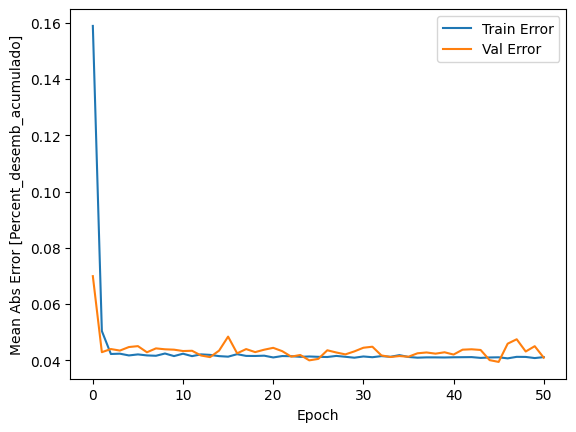

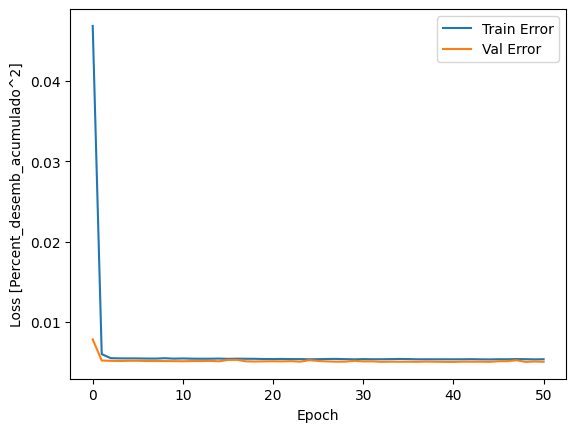

In [50]:
#train the meta-model on neural network

#build the neural network
def build_model():
  model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[len(norm_x_val.keys())]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = "adam"# tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model_deeper = build_model()

#Mostra o progresso do treinamento imprimindo um único pont para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

#o parâmetro patience é a quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model_deeper.fit(norm_x_val, test_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#hist.tail()

def plot_history(history):
    hist =pd.DataFrame(history.history)
    hist['epoch'] =  history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Percent_desemb_acumulado]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    #plt.ylim([0,0.1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss [Percent_desemb_acumulado^2]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    #plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

122/122 [==============================] - 0s 1ms/step


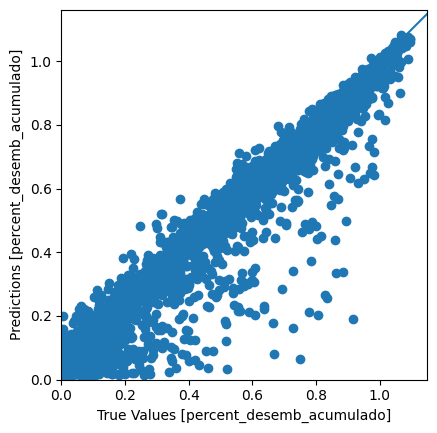

In [51]:
test_predictions = model_deeper.predict(norm_x_val).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [percent_desemb_acumulado]')
plt.ylabel('Predictions [percent_desemb_acumulado]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [52]:
mean_squared_error(test_labels, test_predictions)

0.005302269113654395


....................................................................................................
........

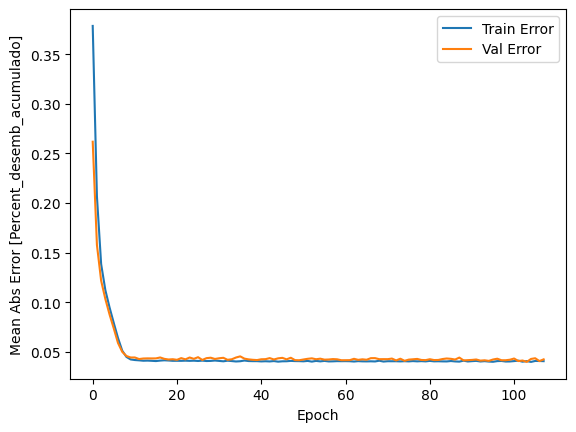

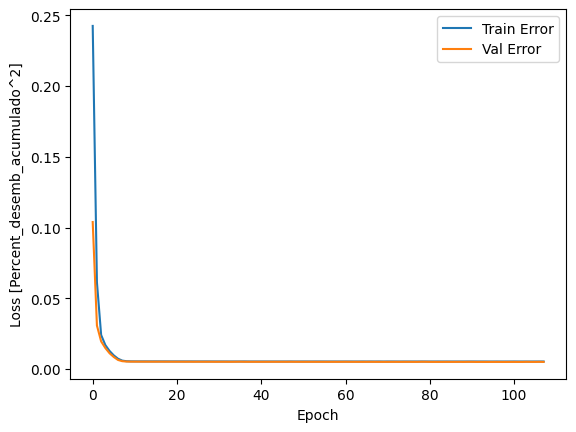

In [54]:
#train the meta-model on neural network

#build the neural network
def build_model():
  model = keras.Sequential([
    layers.Dense(5, activation='relu', input_shape=[len(norm_x_val.keys())]),
    layers.Dense(1)
  ])

  optimizer = "adam"# tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model_deeper = build_model()

#Mostra o progresso do treinamento imprimindo um único pont para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

#o parâmetro patience é a quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model_deeper.fit(norm_x_val, test_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#hist.tail()

def plot_history(history):
    hist =pd.DataFrame(history.history)
    hist['epoch'] =  history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Percent_desemb_acumulado]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    #plt.ylim([0,0.1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss [Percent_desemb_acumulado^2]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    #plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

122/122 [==============================] - 0s 3ms/step
0.005270319462377896


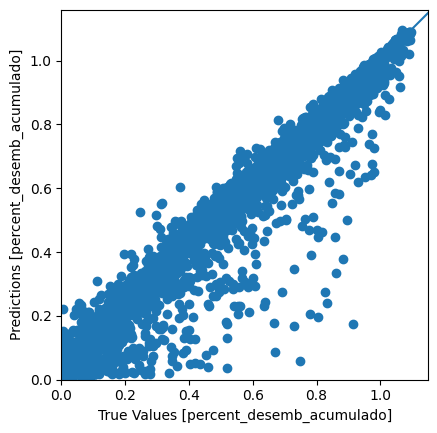

In [56]:
test_predictions = model_deeper.predict(norm_x_val).flatten()
print(mean_squared_error(test_labels, test_predictions))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [percent_desemb_acumulado]')
plt.ylabel('Predictions [percent_desemb_acumulado]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

<Axes: xlabel='percent_desemb_acumulado', ylabel='percent_desemb_acumulado'>

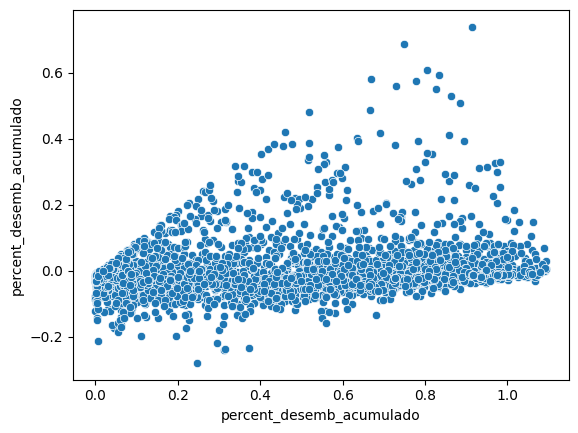

In [57]:
sns.scatterplot(x=test_labels, y=test_labels-test_predictions)